In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
cnn_final = load_model(r'saved_models\final_model\CNN_full_epochs_{epoch_02d}.h5')

In [4]:
# Preprocessing the Test set

data_path_test = os.path.join(os.getcwd(), 'datasets', 'extracted_data', 'test')
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(data_path_test,
                                            target_size = (150, 150),
                                           color_mode = 'rgb',
                                           batch_size = 64,
                                           class_mode = 'binary',
                                           shuffle = False)

# Getting filenames:
filenames = test_set.filenames
nb_samples = len(filenames)

Found 12500 images belonging to 1 classes.


 #### list of strings -- 

 filenames = ['0\\1.jpg',  '0\\10.jpg', ..... ]

In [6]:
type(filenames)

list

In [7]:
filenames

['0\\1.jpg',
 '0\\10.jpg',
 '0\\100.jpg',
 '0\\1000.jpg',
 '0\\10000.jpg',
 '0\\10001.jpg',
 '0\\10002.jpg',
 '0\\10003.jpg',
 '0\\10004.jpg',
 '0\\10005.jpg',
 '0\\10006.jpg',
 '0\\10007.jpg',
 '0\\10008.jpg',
 '0\\10009.jpg',
 '0\\1001.jpg',
 '0\\10010.jpg',
 '0\\10011.jpg',
 '0\\10012.jpg',
 '0\\10013.jpg',
 '0\\10014.jpg',
 '0\\10015.jpg',
 '0\\10016.jpg',
 '0\\10017.jpg',
 '0\\10018.jpg',
 '0\\10019.jpg',
 '0\\1002.jpg',
 '0\\10020.jpg',
 '0\\10021.jpg',
 '0\\10022.jpg',
 '0\\10023.jpg',
 '0\\10024.jpg',
 '0\\10025.jpg',
 '0\\10026.jpg',
 '0\\10027.jpg',
 '0\\10028.jpg',
 '0\\10029.jpg',
 '0\\1003.jpg',
 '0\\10030.jpg',
 '0\\10031.jpg',
 '0\\10032.jpg',
 '0\\10033.jpg',
 '0\\10034.jpg',
 '0\\10035.jpg',
 '0\\10036.jpg',
 '0\\10037.jpg',
 '0\\10038.jpg',
 '0\\10039.jpg',
 '0\\1004.jpg',
 '0\\10040.jpg',
 '0\\10041.jpg',
 '0\\10042.jpg',
 '0\\10043.jpg',
 '0\\10044.jpg',
 '0\\10045.jpg',
 '0\\10046.jpg',
 '0\\10047.jpg',
 '0\\10048.jpg',
 '0\\10049.jpg',
 '0\\1005.jpg',
 '0\\10050.j

## Predicting test data:

In [5]:
# Predicting the classes:
test_predict = cnn_final.predict(test_set)

In [8]:
test_predict

array([[0.855831  ],
       [0.113388  ],
       [0.00474331],
       ...,
       [0.6183345 ],
       [0.00973845],
       [0.80932635]], dtype=float32)

In [9]:
type(test_predict)

numpy.ndarray

# Creating Dataframe to submit:

In [10]:
# In the next improvement will try to find the best value of thresh

def prob_to_class_pred (label, thresh=0.5):
    if label > thresh:
        return 1
    else:
        return 0

In [11]:
# Creating blank Dataframe
result_df = pd.DataFrame(columns=['id', 'label'])

# Assigning values
result_df.id = filenames
result_df.label = test_predict

# Transforming the data to correct format required to submit
result_df.id = result_df.id.apply(lambda x: x[2:].split('.')[0])
result_df.label = result_df.label.apply(prob_to_class_pred)

# Displaying result
result_df.tail()

,id,label
12495,9995,0
12496,9996,1
12497,9997,1
12498,9998,0
12499,9999,1


In [12]:
# Saving the final results
result_df.to_csv('submission.csv', index = False)

# Making a single prediction

In [19]:
import numpy as np
from tensorflow.keras.preprocessing import image

location = 'C:\\Users\\DEEPANKAR MULLICK\\Desktop\\DogCat Classifier\\datasets\\extracted_data\\train\\cat\\cat.8.jpg'
test_image = image.load_img(location, target_size = (150, 150))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn_final.predict(test_image)

In [20]:
result

array([[0.07817933]], dtype=float32)

In [21]:
if result[0]<=0.5:
    print("The image classified is cat")
else:
    print("The image classified is dog")

The image classified is cat


## Displaying the image read:

<function matplotlib.pyplot.show(close=None, block=None)>

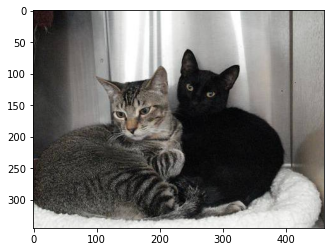

In [24]:
from matplotlib import image
import matplotlib.pyplot as plt
%matplotlib inline

img1 = image.imread(location)
plt.imshow(img1)
plt.show